In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importation du dataset portant sur le canser de seins
donnee_canser_de_sein = pd.read_csv('data.csv')

In [5]:
# Lecture des 5 prémiers lignes
donnee_canser_de_sein.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Detecter si le dtaset comyient des valeurs manquantes
donnee_canser_de_sein.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# Les 5 derniers lignes du dataset
donnee_canser_de_sein.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [8]:
# Un copie du dataset au cas ou on des modifictions 
data_copy = donnee_canser_de_sein.copy()

In [9]:
# Suppression des colonnes inutile pour le modèle
new_donnee_canser_de_sein = donnee_canser_de_sein.drop(columns=["id","Unnamed: 32"])

In [10]:
#  Lecture des 5 prémiers lignes du nouveaux dataset
new_donnee_canser_de_sein.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# Decrires les variables quantitatives pour une bonne prise de decisions
new_donnee_canser_de_sein.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
# Verifier le type des variables
new_donnee_canser_de_sein.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [13]:
# Creation d'un dictionnaire pour le transformation de la variable diagnosis en type entier
valeur_diagnotics = {
    "M":1,
    "B":0
}

In [14]:
# Applications de la transformation sur la variable diagnosis
new_donnee_canser_de_sein['diagnosis'] = new_donnee_canser_de_sein['diagnosis'].replace(valeur_diagnotics)

In [15]:
# Revérifications du type des variables 
new_donnee_canser_de_sein.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Detection des valeurs aberrantes en utilisant la methode IQR
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column].tolist()
    return outliers

In [19]:
outliers = detect_outliers_iqr(new_donnee_canser_de_sein)
# Compté le nombre de valeur aberrantes dans chaque colonnes
def count_outliers(outliers):
    outliers_df = pd.DataFrame([(col, val) for col, vals in outliers.items() for val in vals], columns=['Variable', 'Outlier'])
    print("Valeurs aberrantes détectées par colonne:")
    df_count = outliers_df.groupby('Variable').count()
    return df_count

In [20]:
count_outliers(outliers)

Valeurs aberrantes détectées par colonne:


,Outlier
Variable,
area_mean,25
area_se,65
area_worst,35
compactness_mean,16
compactness_se,28
compactness_worst,16
concave points_mean,10
concave points_se,19
concavity_mean,18


In [21]:
# Fonction pour visualiser les valeurs aberrantes pour toutes les colonnes 
def plot_boxplot_grid(data, nbr_colonne=5):
    total_colonne = len(data.columns)
    nbr_de_ligne = (total_colonne // nbr_colonne) + (total_colonne % nbr_colonne > 0)

    fig, axes = plt.subplots(nrows=nbr_de_ligne, ncols=nbr_colonne, figsize=(20, 5 * nbr_de_ligne))
    axes = axes.flatten()

    for i, column in enumerate(data.columns):
        sns.boxplot(x=data[column], ax=axes[i])
        axes[i].set_title(f'Pour la colonne {column}')

    for j in range(i + 1, nbr_de_ligne * nbr_colonne):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

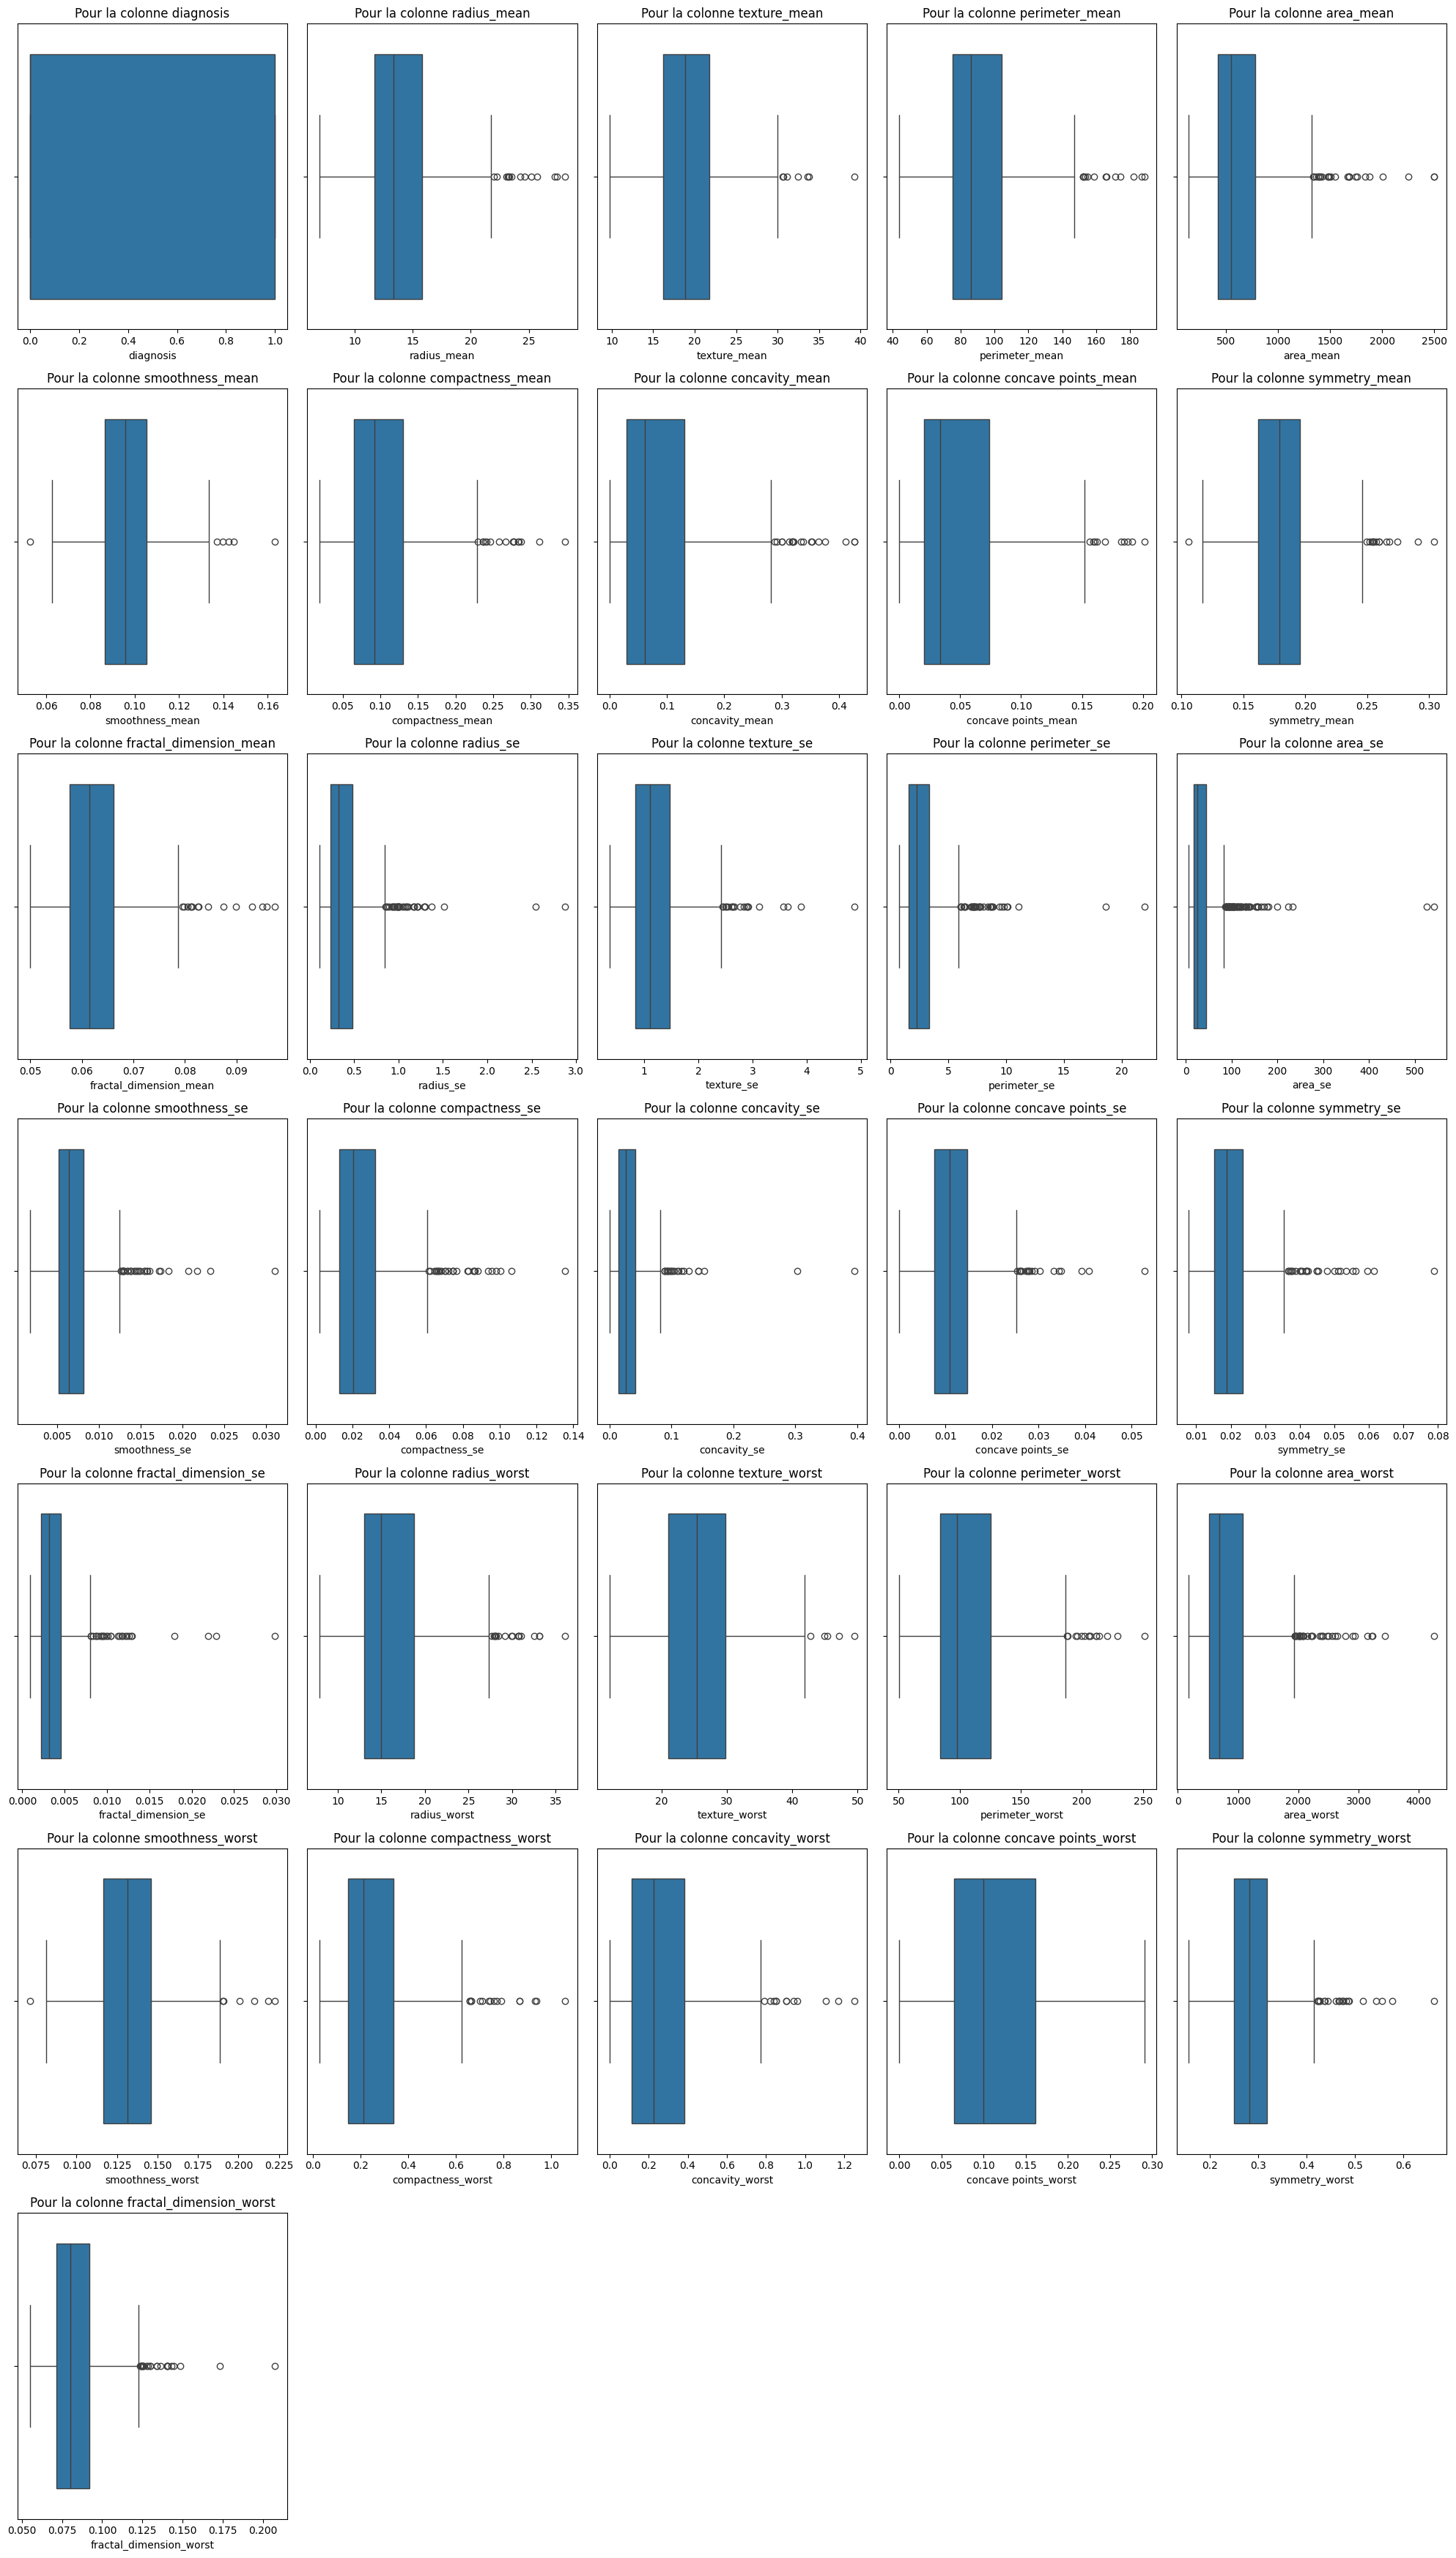

In [22]:
plot_boxplot_grid(new_donnee_canser_de_sein)

In [23]:
# Fonctions pour supprimer les valeurs aberrantes 
def remove_outliers_iqr(df):
    while True:
        outliers = detect_outliers_iqr(df)
        if not outliers:
            break
        count_before = sum(len(vals) for vals in outliers.values())
        print(count_before)
        for col, vals in outliers.items():
            df = df[~df[col].isin(vals)]
        count_after = sum(len(vals) for vals in detect_outliers_iqr(df).values())
        print(count_after)
        if count_before == count_after:
            break
    return df

In [24]:
donnee_sans_valeur_aberrantes = remove_outliers_iqr(new_donnee_canser_de_sein)

608
406
406
115
115
43
43
13
13
10
10
6
6
1
1
2
2
3
3
3


In [25]:
donnee_sans_valeur_aberrantes.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
531,0,11.67,20.02,75.21,416.2,0.10160,0.09453,0.04200,0.021570,0.1859,...,13.35,28.81,87.00,550.6,0.1550,0.29640,0.27580,0.08120,0.3206,0.08950
532,0,13.68,16.33,87.76,575.5,0.09277,0.07255,0.01752,0.018800,0.1631,...,15.85,20.20,101.60,773.4,0.1264,0.15640,0.12060,0.08704,0.2806,0.07782
544,0,13.87,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.023690,0.1620,...,15.05,24.75,99.17,688.6,0.1264,0.20370,0.13770,0.06845,0.2249,0.08492
545,0,13.62,23.23,87.19,573.2,0.09246,0.06747,0.02974,0.024430,0.1664,...,15.35,29.09,97.58,729.8,0.1216,0.15170,0.10490,0.07174,0.2642,0.06953
546,0,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,...,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399


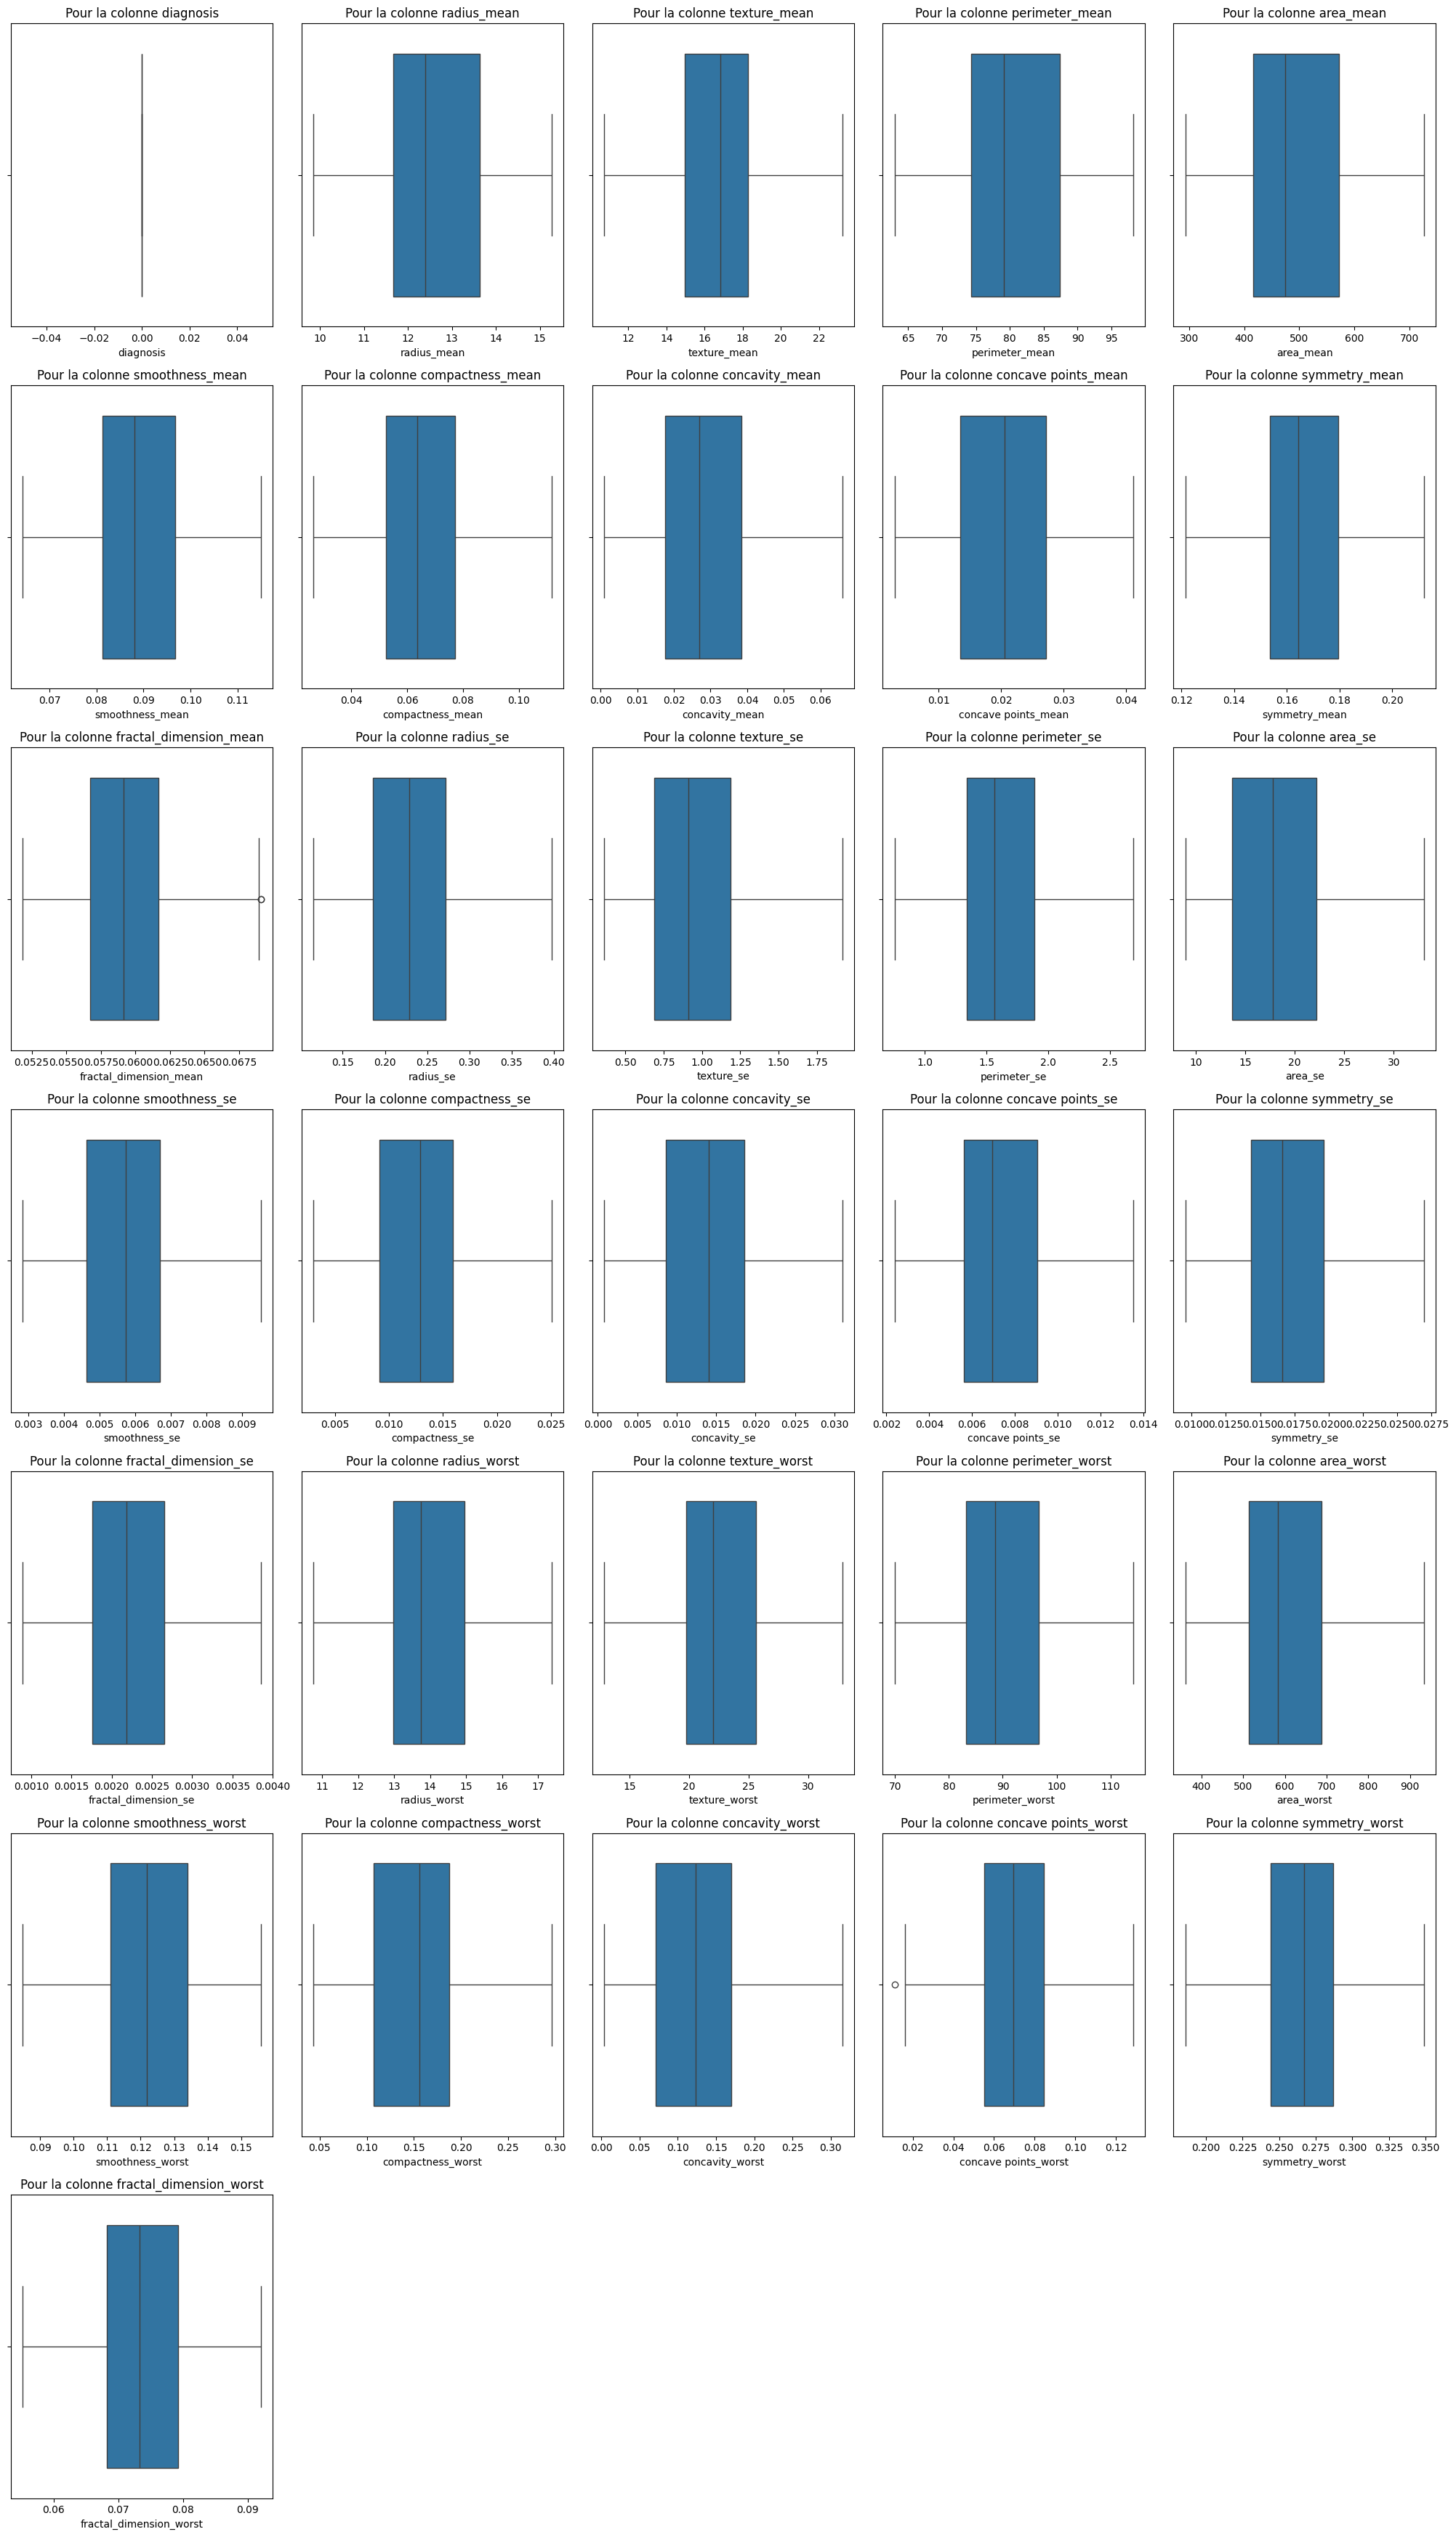

In [26]:
plot_boxplot_grid(donnee_sans_valeur_aberrantes)

In [27]:
donnee_sans_valeur_aberrantes_reel = remove_outliers_iqr(donnee_sans_valeur_aberrantes)

3
6
6
3
3
4
4
1
1
1


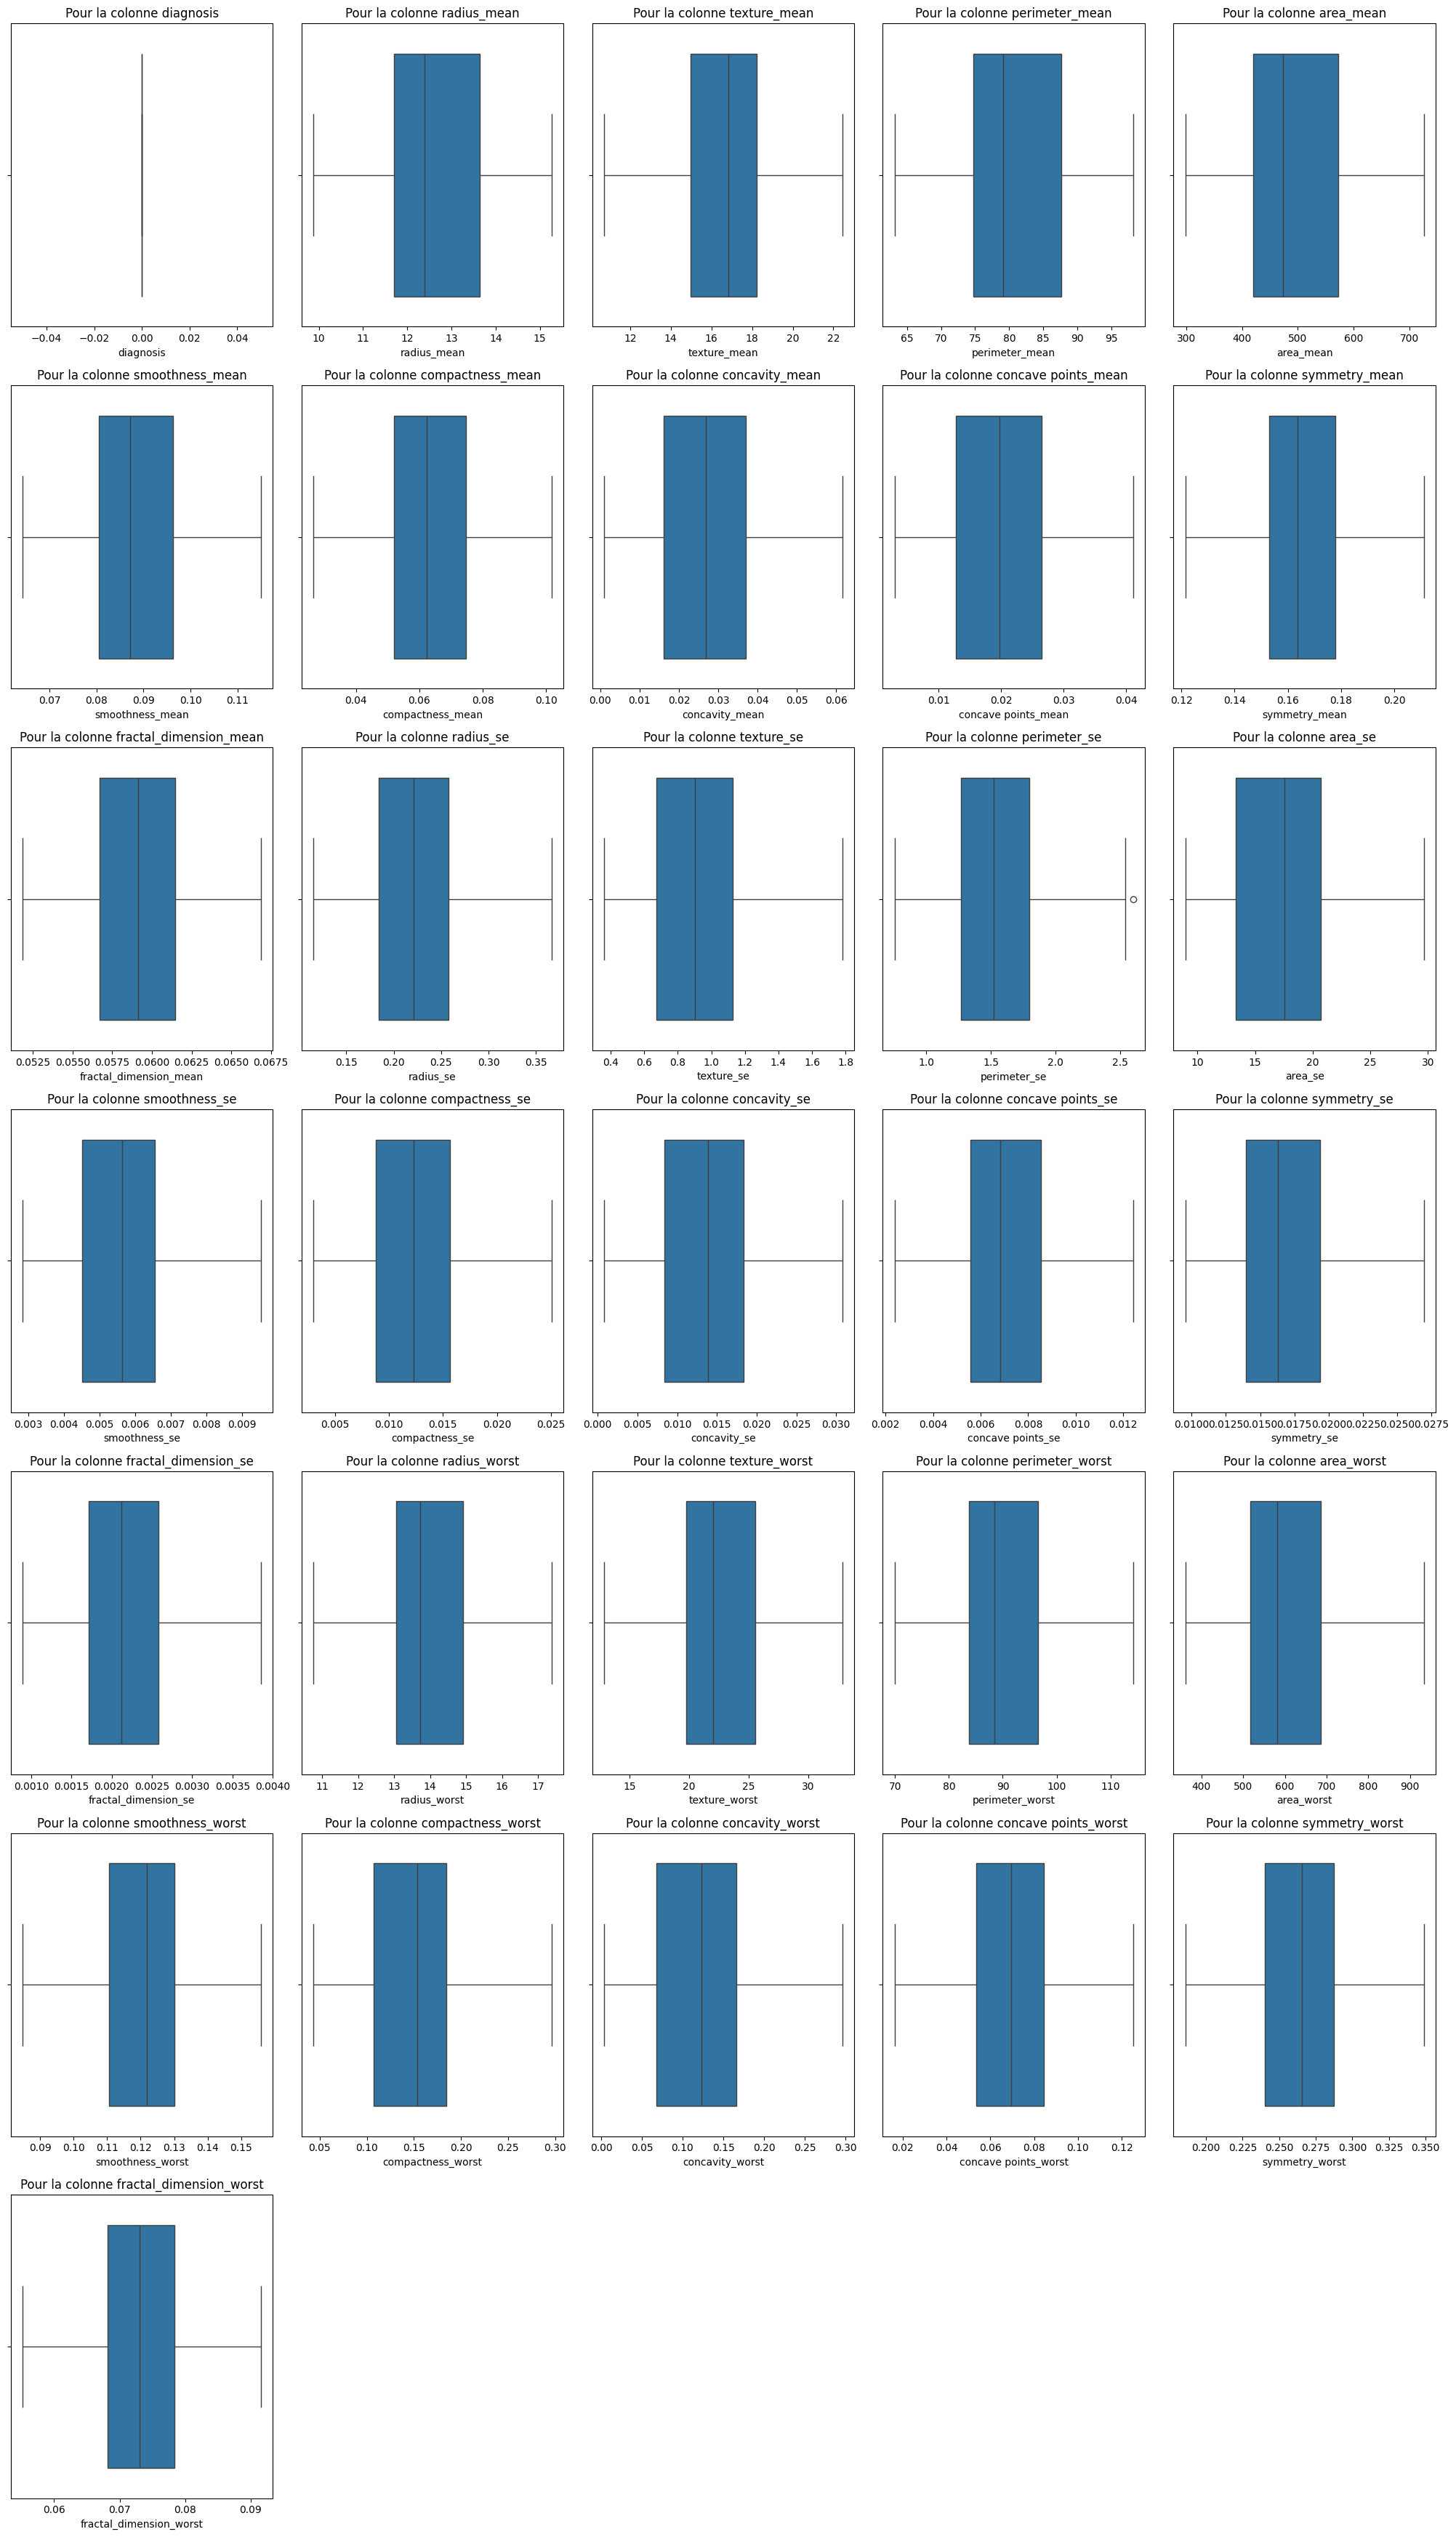

In [28]:
plot_boxplot_grid(donnee_sans_valeur_aberrantes_reel)

In [161]:
# la variables cible
y_var = donnee_sans_valeur_aberrantes_reel.iloc[:,0]

In [164]:
# les variables dependantes
X_var = donnee_sans_valeur_aberrantes_reel.iloc[:,1:31]

In [165]:
# Nous utiliserons cette bibliothèques pour mettres nos données à l'échelle
# Pour cela nous allons utilisé la standardisation
# Qui consiste à soustraire la moyenne par l'ecart-type pour chaque caractéristiques 
# On n'aura pour chaque variable une moyenne de 0 et une ecart-type de 1
from sklearn.preprocessing import StandardScaler

In [166]:
# Initiation de la fonction StandardScaler
scaler = StandardScaler()

In [168]:
# Standisations de nos variables dependantes
colonne_a_standardiser = X_var
X_var = scaler.fit_transform(colonne_a_standardiser)

In [169]:
X_var

array([[ 0.85058637, -0.12189118,  0.84214627, ...,  0.7749358 ,
        -0.96100394,  0.94503212],
       [-0.53681057,  0.61750284, -0.60283519, ..., -0.20267908,
         0.33364721,  0.0983907 ],
       [-1.05096356,  0.92882664, -1.09412889, ...,  0.08121345,
        -0.801753  , -0.95407927],
       ...,
       [ 0.883231  , -0.12578273,  0.91125408, ...,  0.82531071,
         0.39557813,  0.61158987],
       [ 1.03829302,  1.57482352,  1.16381171, ...,  0.03169235,
        -1.24706581,  1.585845  ],
       [-1.85891825, -0.11799963, -1.90960104, ..., -1.8740163 ,
         0.0269417 ,  0.08604098]])

In [170]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.2, random_state = 0)

In [171]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [173]:
# Nous allons initialisée notre model et créer nos differentes couche de neuronne
classification_diagnostics = Sequential()

classification_diagnostics.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 30))
classification_diagnostics.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
classification_diagnostics.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classification_diagnostics.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classification_diagnostics.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7235 - loss: 0.6920      
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.6867 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.6812 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.6754 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.6690 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.6619 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.6534 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.6436 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.6300 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 0.6143 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.5896 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [174]:
y_pred = classification_diagnostics.predict(X_test)
y_pred = (y_pred > 0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [176]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

loss, accuracy = classification_diagnostics.evaluate(X_test, y_test)
    
# Calculer la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
    
# Calculer les métriques de performance
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(cm)
print(precision)
print(recall)
print(f1)
print(loss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0076
[[24]]
0.0
0.0
0.0
0.007624212186783552


In [194]:
# Une fonction pour exploiter le model
def diagnotics_model(model,scaler,data):
    data = pd.DataFrame([data])
    data = scaler.fit_transform(data)
    nouveau_prediction = model.predict(data)
    nouveau_prediction = (nouveau_prediction > 0.5)
    if nouveau_prediction == 1:
       print("le patient est maligne")
    elif nouveau_prediction == 0:
        print("le patient est bénigne")
        

In [195]:
new_donnee_canser_de_sein.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [196]:
nv_donnee = {
    'radius_mean': 10.2, 'texture_mean': 20.5, 'perimeter_mean': 0.2, 'area_mean': 5.0,
    'smoothness_mean': 0.25, 'compactness_mean': 1.25, 'concavity_mean': 5.25,
    'concave points_mean': 1.25, 'symmetry_mean': 0.5, 'fractal_dimension_mean': 0.05,
    'radius_se': 0.5, 'texture_se': 1.0, 'perimeter_se': 0.1, 'area_se': 2.0,
    'smoothness_se': 0.005, 'compactness_se': 0.01, 'concavity_se': 0.015,
    'concave points_se': 0.02, 'symmetry_se': 0.03, 'fractal_dimension_se': 0.005,
    'radius_worst': 15.0, 'texture_worst': 25.0, 'perimeter_worst': 1.0, 'area_worst': 200.0,
    'smoothness_worst': 0.5, 'compactness_worst': 0.75, 'concavity_worst': 1.5,
    'concave points_worst': 1.0, 'symmetry_worst': 0.5, 'fractal_dimension_worst': 0.1
}

In [197]:
diagnotics_model(classification_diagnostics,scaler,nv_donnee)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
le patient est bénigne
